In [1]:
# pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
import numpy as np
import pandas as pd
from numpy.random import randn
np.random.seed(101)

df = pd.DataFrame(randn(5,4), ['A', 'B', 'C', 'D', 'E'], ['W', 'X', 'Y', 'Z'])
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [2]:
print(df.loc['B','Y'])
print()
print(df.iloc[[1],[2]])

-0.8480769834036315

          Y
B -0.848077


In [3]:
# Give me the 'X' column where 
# any 'W' value is greater than 0 and 'Y' less than 0
# & or |
df[(df['W']>0) & (df['Y']<0)]['X']

B   -0.319318
D   -0.758872
Name: X, dtype: float64

In [4]:
newind = 'CA NY OR WY CO'.split()
df['States'] = newind
# would need to add "inplace=True" to make permanent
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
OR,-2.018168,0.740122,0.528813,-0.589001
WY,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [5]:
# Make df from dict
d = {'A':[1,2,np.nan], 'B':[5,np.nan,np.nan],'C':[1,2,3]}
df1 = pd.DataFrame(d)
df1

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [6]:
# df1.dropna(axis=1)
# df1.fillna(value='X')

In [7]:
def times2(x):
    return x*2

df1['A'].apply(times2)

0    2.0
1    4.0
2    NaN
Name: A, dtype: float64

In [8]:
df1.sort_values('A',ascending=False)

,A,B,C
1,2.0,NaN,2
0,1.0,5.0,1
2,NaN,NaN,3


# Normal distributions in Scipy

##### scipy.stats.norm = < scipy.stats._continuous_distns.norm_gen object at 0x4502f32c >

A normal continuous random variable.

The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

As an instance of the rv_continuous class, norm object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution.

The probability density function for norm is:

$ norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi) $

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, norm.pdf(x, loc, scale) is identically equivalent to norm.pdf(y) / scale with y = (x - loc) / scale.

##### Methods

pdf(x, loc=0, scale=1) Probability density function.

logpdf(x, loc=0, scale=1)	Log of the probability density function.

cdf(x, loc=0, scale=1)	Cumulative density function.

logcdf(x, loc=0, scale=1)	Log of the cumulative density function.

ppf(q, loc=0, scale=1)	Percent point function (inverse of cdf — percentiles).

stats(loc=0, scale=1, moments='mv')	Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).

median(loc=0, scale=1)	Median of the distribution.

mean(loc=0, scale=1)	Mean of the distribution.

var(loc=0, scale=1)	Variance of the distribution.

std(loc=0, scale=1)	Standard deviation of the distribution.

interval(alpha, loc=0, scale=1)	Endpoints of the range that contains alpha percent of the distribution

In [9]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt

data = pd.read_excel('AMZN-DUK-KO.xlsx')
data.head()

,Date,AMZN,DUK,KO
0,2007-01-03,38.700001,34.971017,17.874906
1,2007-01-04,38.900002,35.044103,17.882263
2,2007-01-05,38.369999,34.240172,17.757161
3,2007-01-08,37.500000,34.294985,17.871225
4,2007-01-09,37.779999,34.130544,17.885944


In [10]:
print(data.dtypes)
print(data.describe())

Date    datetime64[ns]
AMZN           float64
DUK            float64
KO             float64
dtype: object
              AMZN          DUK           KO
count  2519.000000  2519.000000  2519.000000
mean    259.103248    50.628416    29.679229
std     199.473289    15.755612     8.395471
min      35.029999    24.091136    14.697541
25%      89.005001    35.729814    21.749812
50%     205.440002    50.130517    29.235258
75%     333.059998    63.998470    37.285204
max     844.359985    84.442059    45.368681


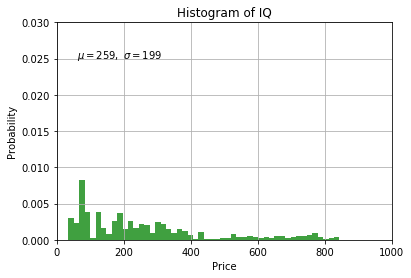

In [11]:
x = data.AMZN
y = data.DUK
z = data.KO

plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=259,\ \sigma=199$')
plt.axis([0, 1000, 0, 0.03])
plt.grid(True)
plt.show()

In [12]:
# Calculate mean, variance and std with Numpy/Scipy functions

print("Mean : {0:8.6f}".format(sp.mean(x)))

print("Variance : {0:8.6f}".format(sp.var(x)))

print("Std. deviation : {0:8.6f}".format(sp.std(x)))

Mean : 259.103248
Variance : 39773.797148
Std. deviation : 199.433691


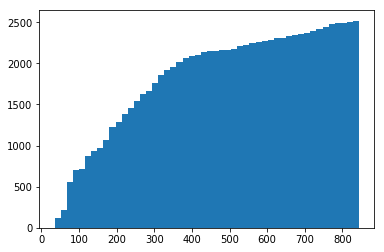

In [13]:
plt.hist(x, 50, cumulative=True)
plt.show()

In [14]:
stats.shapiro(x)

(0.8632957935333252, 2.3331619431008204e-42)

In [15]:
a = sp.stats.zscore(x, axis=0, ddof=0)
len(a)
a[:10]

array([-1.1051455 , -1.10414266, -1.1068002 , -1.11116254, -1.10975857,
       -1.1129175 , -1.11166395, -1.1076526 , -1.10534607, -1.10925714])

In [16]:
sp.stats.ttest_ind(data['AMZN'], data['DUK'])

Ttest_indResult(statistic=52.29166109065594, pvalue=0.0)

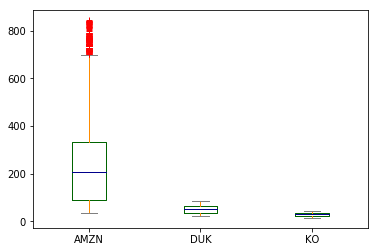

In [17]:
%matplotlib inline

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

data.plot(kind='box', color=color, sym='r+')
#data.plot(kind='box')

In [18]:
df = pd.read_excel('AMZN-DUK-KO.xlsx', index_col='Date')
df.head()

,AMZN,DUK,KO
Date,,,
2007-01-03,38.700001,34.971017,17.874906
2007-01-04,38.900002,35.044103,17.882263
2007-01-05,38.369999,34.240172,17.757161
2007-01-08,37.500000,34.294985,17.871225
2007-01-09,37.779999,34.130544,17.885944


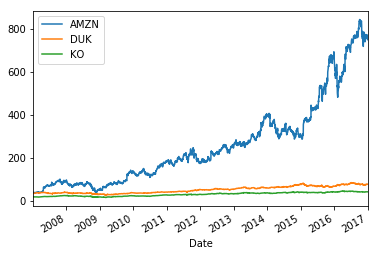

In [34]:
data.plot(kind='line', x='Date', y=['AMZN', 'DUK', 'KO'])

# Parametric

##### Paire ttest
stats.ttest_rel(a, b, axis=0, nan_policy='propagate')

##### Students ttest
stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

##### Welch's ttest
stats.ttest_ind(a, b, axis=0, equal_var=False, nan_policy='propagate')

# Non-parametric
##### Wilcoxon Signed Rank Test
stats.wilcoxon(x, y=None, zero_method='wilcox', correction=False)

##### Mann-Whitney U
stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

##### Wilcoxon Rank Sum
stats.ranksums(x, y)¶

# Parametric (multiple groups)
##### One way ANOVA
stats.f_oneway(*args)

##### Kruskal Wallis H-test for independent samples
stats.kruskal(args, *kwargs)

# Non-parametric multiple groups

##### Friedman
stats.friedmanchisquare(*args)

##### Kruskal Wallis H test for independent samples
stats.kruskal(args, *kwargs)

# Categorical data
##### Chi-Square Test 
stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)

##### Fisher's Exact Test
stats.fisher_exact(table, alternative='two-sided')

##### McNemar Test
stats.chi2contingency(observed, correction=True, lambda=None)

# Correlation

##### Pearson's correlation
stats.pearsonr(x, y)

##### Normalised Cross-Correlation - Cross-correlate two N-dimensional arrays.
scipy.signal.correlate(in1, in2, mode='full', method='auto')

##### FFT
numpy.fft.fft(a, n=None, axis=-1, norm=None)

# Linear Regression

stats.linregress(x, y=None)

# scipy.stats functions
describe(a[, axis, ddof, bias, nan_policy])	Compute several descriptive statistics of the passed array.

kurtosis(a[, axis, fisher, bias, nan_policy])	Compute the kurtosis (Fisher or Pearson) of a dataset.

kurtosistest(a[, axis, nan_policy])	Test whether a dataset has normal kurtosis.

mode(a[, axis, nan_policy])	Return an array of the modal (most common) value in the passed array.

normaltest(a[, axis, nan_policy])	Test whether a sample differs from a normal distribution.

skew(a[, axis, bias, nan_policy])	Compute the skewness of a data set.

skewtest(a[, axis, nan_policy])	Test whether the skew is different from the normal distribution.


variation(a[, axis, nan_policy])	Compute the coefficient of variation, the ratio of the biased standard deviation to the mean.

cumfreq(a[, numbins, defaultreallimits, weights])	Return a cumulative frequency histogram, using the histogram function.

itemfreq(a)	Return a 2-D array of item frequencies.

relfreq(a[, numbins, defaultreallimits, weights])	Return a relative frequency histogram, using the histogram function.

binned_statistic(x, values[, statistic, ...])	Compute a binned statistic for one or more sets of data.

sem(a[, axis, ddof, nan_policy])	Calculate the standard error of the mean (or standard error of measurement) of the values in the input array.

zmap(scores, compare[, axis, ddof])	Calculate the relative z-scores.

zscore(a[, axis, ddof])	Calculate the z score of each value in the sample, relative to the sample mean and standard deviation.

iqr(x[, axis, rng, scale, nan_policy, ...])	Compute the interquartile range of the data along the specified axis.

f_oneway(*args)	Performs a 1-way ANOVA.

pearsonr(x, y)	Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.

spearmanr(a[, b, axis, nan_policy])	Calculate a Spearman rank-order correlation coefficient and the p-value to test for non-correlation.

linregress(x[, y])	Calculate a linear least-squares regression for two sets of measurements.

ttest_ind(a, b[, axis, equal_var, nan_policy])	Calculate the T-test for the means of two independent samples of scores.

ttest_rel(a, b[, axis, nan_policy])	Calculate the T-test on TWO RELATED samples of scores, a and b.

kstest(rvs, cdf[, args, N, alternative, mode])	Perform the Kolmogorov-Smirnov test for goodness of fit.

chisquare(f_obs[, f_exp, ddof, axis])	Calculate a one-way chi square test.

power_divergence(f_obs[, f_exp, ddof, axis, ...])	Cressie-Read power divergence statistic and goodness of fit test.

ks_2samp(data1, data2)	Compute the Kolmogorov-Smirnov statistic on 2 samples.

mannwhitneyu(x, y[, use_continuity, alternative])	Compute the Mann-Whitney rank test on samples x and y.

tiecorrect(rankvals)	Tie correction factor for ties in the Mann-Whitney U and Kruskal-Wallis H tests.

rankdata(a[, method])	Assign ranks to data, dealing with ties appropriately.

ranksums(x, y)	Compute the Wilcoxon rank-sum statistic for two samples.

wilcoxon(x[, y, zero_method, correction])	Calculate the Wilcoxon signed-rank test.

kruskal(*args, \**kwargs)	Compute the Kruskal-Wallis H-test for independent samples

friedmanchisquare(*args)	Compute the Friedman test for repeated measurements

shapiro(x)	Perform the Shapiro-Wilk test for normality.